In [13]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
import xarray as xr

import neuro_op as nop

In [43]:
RANDOM_SEED = 0
#rng0 = random.Random(RANDOM_SEED)
rng = np.random.default_rng(RANDOM_SEED)


a = st.norm(0,1)
b = st.norm(0,1)
print(a.rvs(4))
print(b.rvs(4))

[1.76405235 0.40015721 0.97873798 2.2408932 ]
[ 1.86755799 -0.97727788  0.95008842 -0.15135721]


In [38]:
nop.plot_setup()
cmap = "inferno"

# Purpose

Analyse behaviour of a single node in neuro_op's framework.

Scanned dimensions:
- $\mu\in [0.0,1.0,...,5.0]$
- $\sigma\in [0.5,1,5,10]$

In [8]:
def get_name(mu, sd, sdw):
    return str(
        "../testing/@n1_amor/BlackJack1/output/"
        + "out"
        + "-sdw"
        + str(sdw)
        + "-mu"
        + str(mu)
        + "-sd"
        + str(sd)
        + ".h5"
    )


def get_kld(mu, sd, sdw):
    data = nop.import_hdf5(get_name(mu, sd, sdw))
    return data["kl_divs"][:, 0]


def get_mu(mu, sd, sdw):
    data = nop.import_hdf5(get_name(mu, sd, sdw))
    return data["mu_nodes"][:, 0]

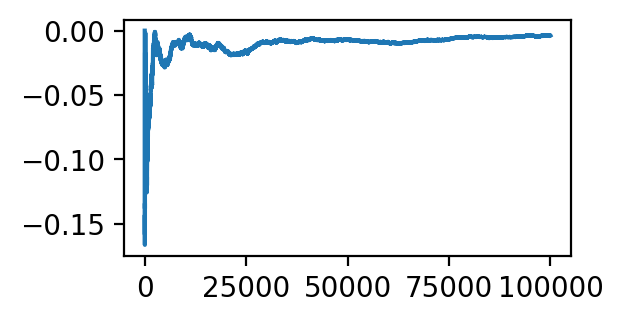

In [11]:
dat = nop.import_hdf5(get_name(0.0, 0.2, 0.0))
plt.plot(dat["mu_nodes"])
dat["nodesConjMu"][0]

In [17]:
# Create xarray dataset with the following dimensions:
# - time
# - mu
# - sigma (standard deviation sd)

mu0_arr = [0, 1, 10]
sd_arr = [0.1, 1, 10]
t_arr = np.arange(0, 100001, 1)
mu_arr = np.zeros((len(mu0_arr), len(sd_arr), len(t_arr)))
kld_arr = np.zeros((len(mu0_arr), len(sd_arr), len(t_arr)))

for i, mu in enumerate(mu0_arr):
    for j, sd in enumerate(sd_arr):
        mu_arr[i, j] = get_mu(mu, sd)[: len(t_arr)]
        kld_arr[i, j, :] = get_kld(mu, sd)[: len(t_arr)]

da_mu = xr.DataArray(
    mu_arr,
    dims=["mu", "sd", "time"],
    coords={"mu": mu0_arr, "sd": sd_arr, "time": t_arr},
)
da_kld = xr.DataArray(
    kld_arr,
    dims=["mu", "sd", "time"],
    coords={"mu": mu0_arr, "sd": sd_arr, "time": t_arr},
)

TypeError: get_mu() missing 1 required positional argument: 'sdw'

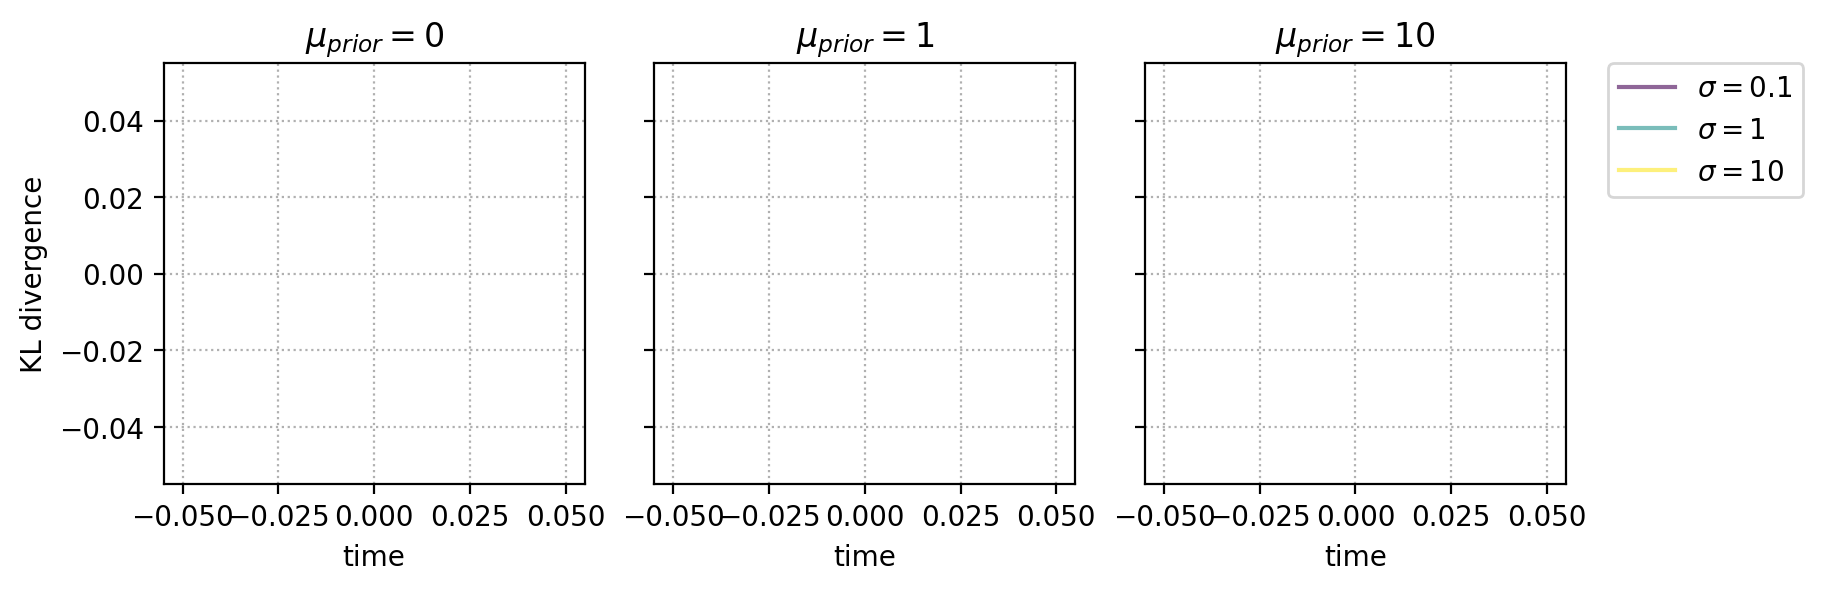

In [ ]:
da = da_kld
fig, ax = plt.subplots(1, len(mu0_arr), figsize=(9, 4), sharex=True, sharey=True)
for i, mu in enumerate(mu0_arr):
    ax[i].set_prop_cycle(color=nop.get_colorcycle(len(sd_arr)))
    for j, sd in enumerate(sd_arr):
        ax[i].plot(
            da.coords["time"][1:], da[i, j, 1:], label="$\sigma=$" + str(sd), alpha=0.6
        )
        # ax[i].loglog()
        ax[i].grid(linestyle=":")
    if i == 0:
        ax[i].set_ylabel("KL divergence")
    if i == len(mu0_arr) - 1:
        ax[i].legend(loc="upper left", bbox_to_anchor=(1.1, 1), borderaxespad=0.0)

    ax[i].set_xlabel("time")
    ax[i].set_title("$\mu_{prior}=$" + str(mu))
    ax[i].set_aspect("equal")

fig.savefig("graphics-output/TMP-ClosedCasino.png")

In [ ]:
# fig, ax = plt.subplots(1, len(mu0_arr), figsize=(8, 2), sharex=True, sharey=True)
#
# for i, mu in enumerate(mu0_arr):
#    ax[i].set_prop_cycle(color=nop.get_colorcycle(len(sd_arr)))
#    da_kld.sel(mu=mu).plot(ax=ax[i], x="time", hue="sd", alpha=0.6)
#    ax[i].loglog()